# Example use case
In this example use case we can observe a basic dataset analysis. The dataset of choice is about candy. For our analysis, we will make use of several Python packages which will be centrally imported here.

In [13]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import os
import collections
import seaborn as sns

## Import data
First of all, we import our data. We use an online source which is my GitHub, however, the data is not my own (which is properly documented in the README).

In [14]:
data_url = "https://raw.githubusercontent.com/miosga2309/candy_usecase/master/candy-data.csv"
df = pd.read_csv(data_url)

Let's see how the data looks like.

In [15]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


This seems to be a good opportunity to describe our variables.

### Variable descriptions
#### Explanatory variables
- **competitorname**: name of the candy brand (string)
- **chocolate**: indicates if the candy contains chocolate (binary)
- **fruity**: indicates if the candy is fruity (binary)
- **caramel**: indicates if the candy contains caramel (binary)
- **peanutyalmondy**: indicates if the candy contains nuts (binary)
- **nougat**: indicates if the candy contains nougat (binary)
- **crispedricewafer**: indicates if the candy is crispy (binary)
- **hard**: indicates if the candy is hard opposed to soft (binary)
- **bar**: indicates if the candy comes in the form of a bar (binary)
- **pluribus**: indicates if the candy comes in the form of multiples, e.g. gummy bears (binary)
- **sugarpercent**: indicates in which percentage -in reference to all other candies- the candy is with regard to sugar content (numeric)
- **pricepercent**: indicates in which percentage -in reference to all other candies- the candy is with regard to pricing (numeric)

#### Target variable
- **winpercent**: indicates in which percentage -in reference to all other candies- the candy is with regard to preference by the participants of the experiment (numeric)

We can use the pandas function `describe` to get an overview of our variables. Note that we only get numeric summaries of our binary variables which isn't very helpful.

In [16]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


A better way to get a first glimpse on our variables are tables or plots. At this point, we are already starting with our exploratory data analysis where we inspect our data free of expectations and assumptions.

## Exploratory data analysis
### Distributions per feature
First, we try tables for our binary variables. We can either use the built-in functions of `pandas` or ...

In [17]:
print(df.chocolate.value_counts())
print(df.fruity.value_counts())
print(df.caramel.value_counts())
print(df.peanutyalmondy.value_counts())
print(df.nougat.value_counts())
print(df.crispedricewafer.value_counts())
print(df.hard.value_counts())
print(df.bar.value_counts())
print(df.pluribus.value_counts())

0    48
1    37
Name: chocolate, dtype: int64
0    47
1    38
Name: fruity, dtype: int64
0    71
1    14
Name: caramel, dtype: int64
0    71
1    14
Name: peanutyalmondy, dtype: int64
0    78
1     7
Name: nougat, dtype: int64
0    78
1     7
Name: crispedricewafer, dtype: int64
0    70
1    15
Name: hard, dtype: int64
0    64
1    21
Name: bar, dtype: int64
1    44
0    41
Name: pluribus, dtype: int64


... or we use `counter` from *collections* or ...

In [18]:
dict(collections.Counter(df.peanutyalmondy))

{0: 71, 1: 14}

... we write our own function for peanutyalmondy as an example.

In [19]:
print(set(df.peanutyalmondy)) # to make sure that there are only 0 and 1 in the column.
str(len(df.peanutyalmondy[df.peanutyalmondy == 1])) + ' of all candies are peanuty/almondy and ' + str(len(df.peanutyalmondy[df.peanutyalmondy == 0])) + ' are not.'

{0, 1}


'14 of all candies are peanuty/almondy and 71 are not.'

Alternatively, we could have also used bar charts. You can use whatever you like. Again, we used *pandas* `plot` methods because it is really convenient.

<AxesSubplot:>

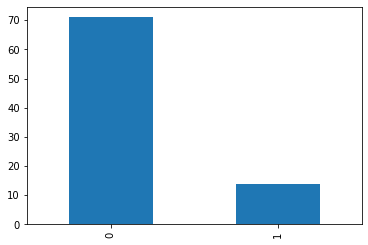

In [20]:
df.peanutyalmondy.value_counts().plot.bar()

By now, you have guessed that we took the feature peanuty/almondy for a reason. The group sizes of peanuty/almondy and not peanuty/almondy are very different which can be very important for the statistical method you may use later on.

Let's also visualize our numeric variables. Of course, frequency tables or bar charts are not a good choice anymore. We use histograms and put all our numeric variables in one plot.

<AxesSubplot:>

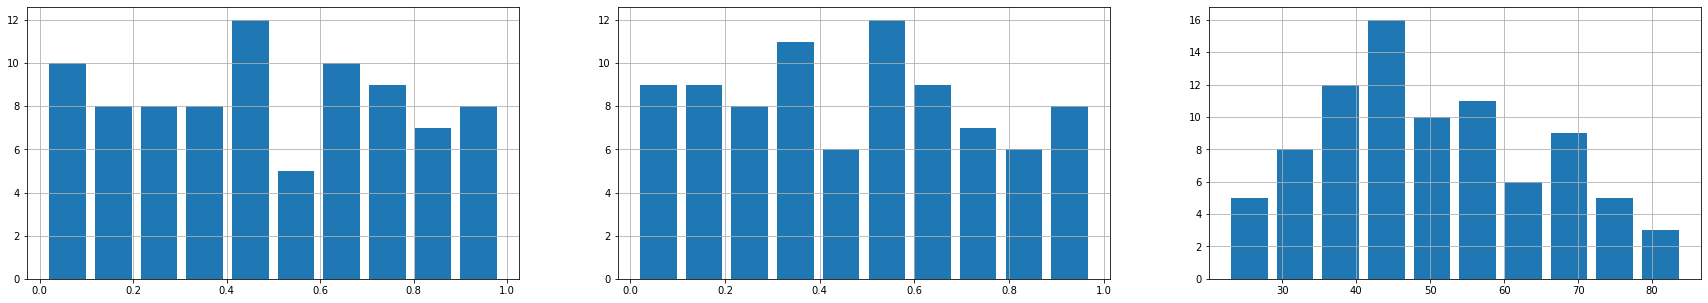

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(30,5))
df.sugarpercent.hist(ax=axes[0],rwidth=0.8) 
df.pricepercent.hist(ax=axes[1],rwidth=0.8) 
df.winpercent.hist(ax=axes[2],rwidth=0.8) 

### Correlation matrix
Using *pandas* correlation matrix (`corr` function) and coloring it with *seaborn*'s `heatmap` gives a good first overview of our variables and their associations. Remember that winpercent as our popularity feature is the target variable. With this matrix, you can quickly identify variables that are determining popularity quite well, e.g. peanuty/almondy and chocolate seem to enhance popularity while fruity is decreasing it.

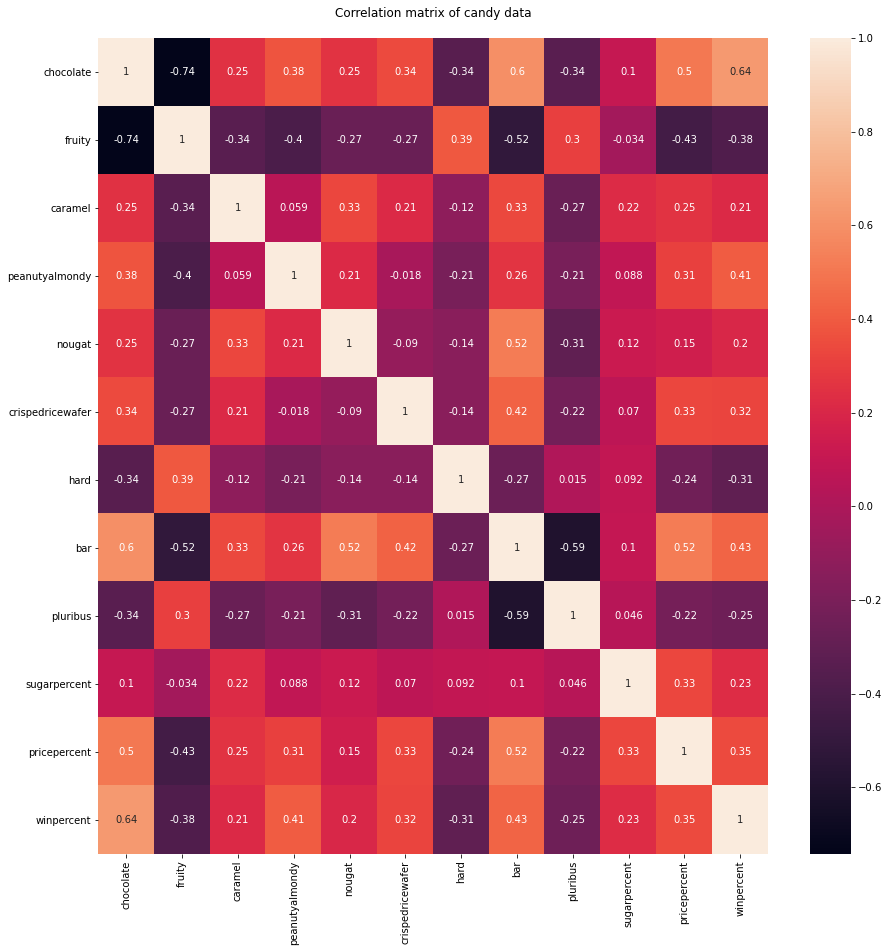

In [22]:
fig, ax = plt.subplots(figsize=(15,15))  
hm = sns.heatmap(df.corr(), annot = True, ax=ax)
hm.set(title = "Correlation matrix of candy data\n")
plt.show()

## Data preprocessing
Data preprocessing is an important step in every data analysis. In the best case, you look through your data in the preprocessing process and find no issues. In almost any case, especially when working with real-world dataset which aren't coming from kaggle or a student GitHub account, you will find something and need to take action.

Preprocessing is usually handled very individually per dataset. A feature (e.g., column, variable) in a data may have a wrong format, for instance, numbers are stored as strings. You could also find outliers that are not plausible such as a person's height of 32.13 meters. 

Data exploration is not only good for getting to know your data better, it also helps you to find issues for the preprocessing. As you can imagine, there is not the one correct order of exploring and preprocessing your data. It is a cyclical process where you look at your data, find an issue, handle it, and look at your data again.

The following steps are common preprocessing steps:
- Data quality assessment
    - Outlier analysis
    - Data type analysis
    - Data scale analysis
- Data cleaning
    - Handling missing data
    - Handling noisy data
- Data transformation
    - Aggregation
    - Normalization
    - Feature selection
    - Discreditization
- Data reduction
    - Attribute selection
    - Dimensionality reduction

With our data, we focus on data scales and missing data.

### Data scale analysis
Looking at the percentage features in our dataset, we quickly notice that *sugarpercent* and *pricepercent* are between 0 and 1, and *winpercent* ist between 0 and 100. Although the difference wouldn't do any harm in our analyses, let's bring them on an equal scale.

In [25]:
df['winpercentconv'] = df.winpercent/100
df.winpercentconv[0:5]

0    0.669717
1    0.676029
2    0.322611
3    0.461165
4    0.523415
Name: winpercent, dtype: float64